<a href="https://colab.research.google.com/github/alistechworld/Machine-Learning-Hands-On-Practice-and-Code/blob/main/Day_16_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Function Transformation
# Log Transformer
# Reciprocal Transformer
# Square Root Transformer

In [12]:
from google.colab import files
uploaded = files.upload()

Saving train (9).csv to train (9).csv


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [14]:
df = pd.read_csv('train (9).csv', usecols=['Age', 'Fare', 'Survived'])

In [15]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [16]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [17]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipython-input-1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [18]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [19]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [20]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-2660951613.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


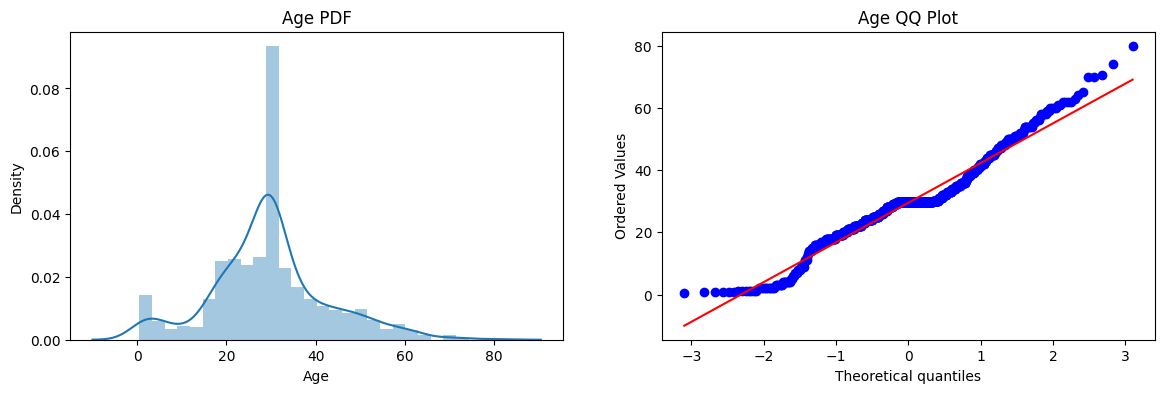

In [22]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(1, 2, 2)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

/tmp/ipython-input-3190548655.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


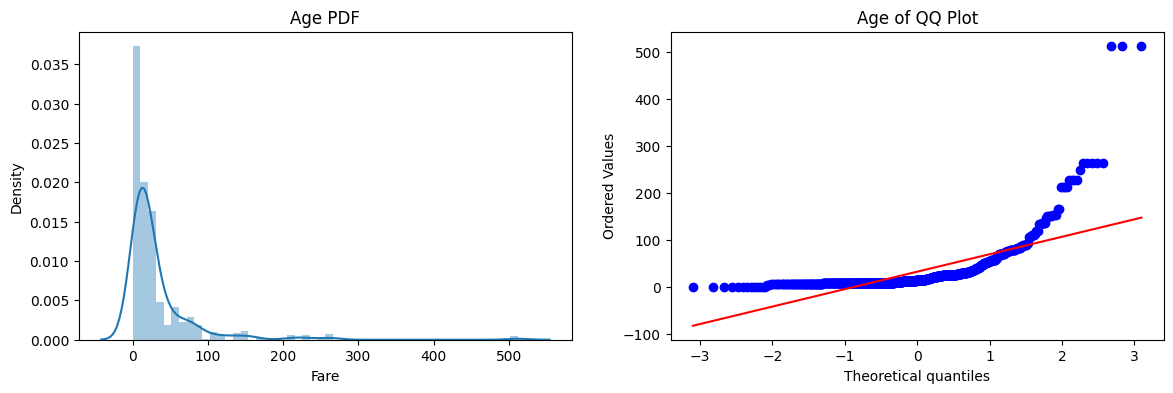

In [23]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(1, 2, 2)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Age of QQ Plot')

plt.show()

In [24]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [26]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [27]:
trf = FunctionTransformer(func=np.log1p)

In [28]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [29]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6983240223463687


In [32]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6577403245942572


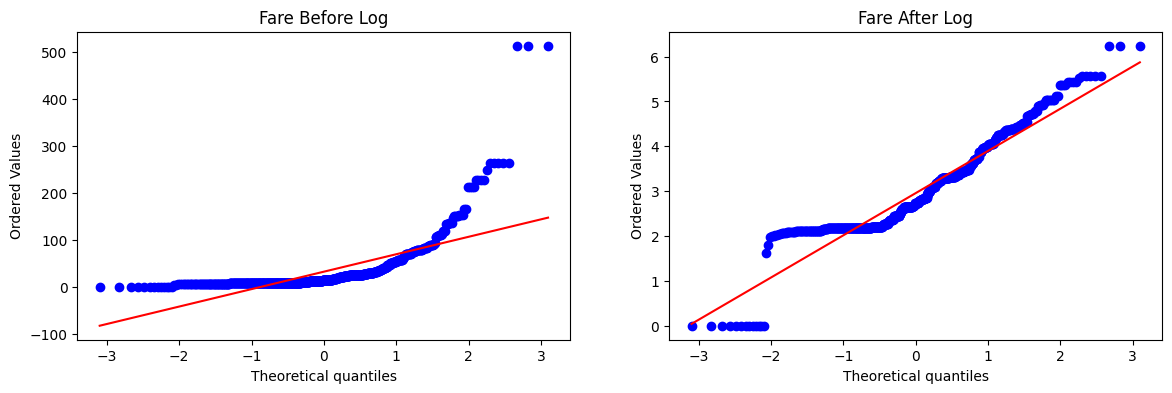

In [33]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

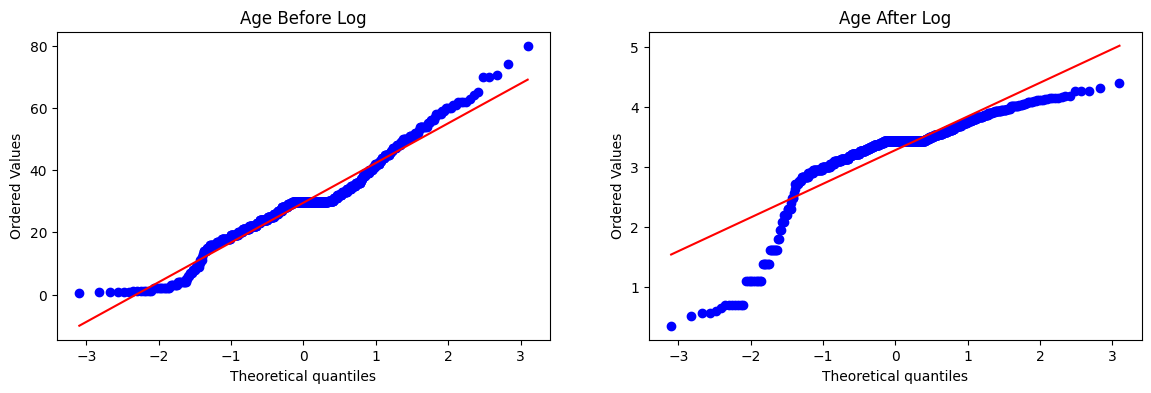

In [34]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [35]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [36]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [37]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6599750312109862


In [38]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


Accuracy 0.6195131086142323


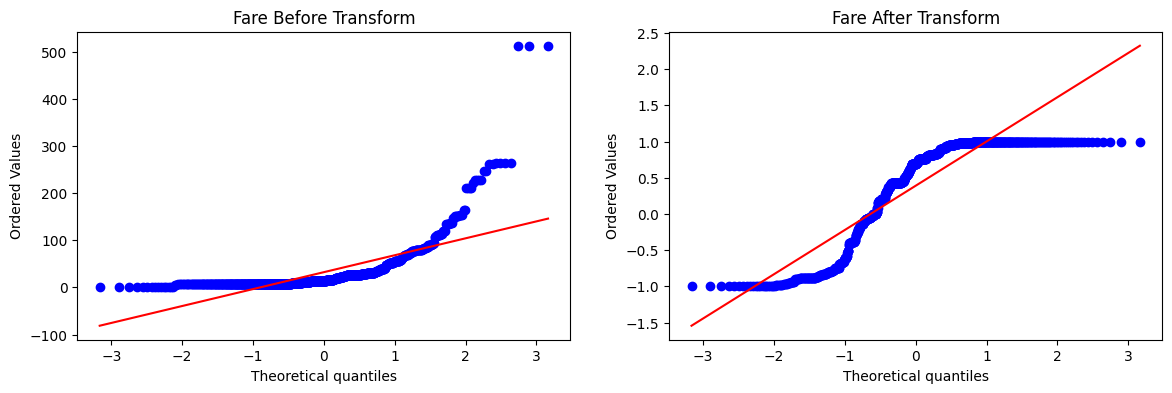

In [39]:
apply_transform(np.sin)